In [4]:
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
import qiskit as qk

from context import tools as t

plt.style.use('science')

In [43]:
def a_arr(counts_lst, desired_str):
    assert(len(desired_str)==len(list(counts_lst[0].keys())[0]))
    shots = sum(list(counts_lst[0].values()))
    desired_basis_states = t.bit_combinations(desired_str)
    arr = np.zeros(len(counts_lst))
    for i, dic in enumerate(counts_lst):
        for state in desired_basis_states:
            print(state, dic.get(state, 0))
            arr[i] += dic.get(state, 0)/shots
    return arr

def plot_amplification(arr_sim, arr_ibm, filename=None):
    a = arr_sim[0]
    theta = np.arcsin(np.sqrt(a))
    m = np.arange(len(arr_sim))
    ms = np.linspace(m[0], m[-1], 1000)
    
    fig = plt.figure(figsize = (20, 10))
    plt.xlabel(r'$m$')
    plt.ylabel('Prob of measuring good basis state')
    plt.plot(m, arr_sim, 'o', label='sim')
    plt.plot(m, arr_ibm, 'o', label='ibm')
    plt.plot(ms, np.sin((2*ms+1)*theta)**2, label='theoretical')
    plt.axvline(x=np.floor(np.pi/(4*theta)), c='k', ls='--', label=r'$m_{floor}$')
    plt.axhline(y=max(a, 1-a), c='b', ls='--', label=r'max$(1-a,a)$')
    plt.legend()
    if filename != None:
        plt.savefig(time_name(filename), format='png', dpi=600)
    plt.plot()
    return

In [5]:
# build A
qr, qc = t.circ(2)
qc.h(0)
qc.cnot(0, 1)
A_circ = deepcopy(qc)
B_circ = deepcopy(qc)

qr, qc = t.circ(4)
qc.compose(A_circ, qr[:2], inplace=True)
qc.compose(B_circ, qr[-2:], inplace=True)
qc.cnot(0, 3)
qc.h(0)
U_circ = deepcopy(qc)
print(U_circ.draw())

     ┌───┐          ┌───┐
q_0: ┤ H ├──■────■──┤ H ├
     └───┘┌─┴─┐  │  └───┘
q_1: ─────┤ X ├──┼───────
     ┌───┐└───┘  │       
q_2: ┤ H ├──■────┼───────
     └───┘┌─┴─┐┌─┴─┐     
q_3: ─────┤ X ├┤ X ├─────
          └───┘└───┘     


In [6]:
circs = t.ampl_circs(U_circ, '0.10')
circs_ancilla = t.ampl_ancilla_circs(U_circ, '0.10')

In [8]:
j = t.job_set(circs, name='4_qubit_ampl')
j_ancilla = t.job_set(circs_ancilla, name='4_qubit_ampl_ancilla')

In [11]:
counts_sim = t.get_counts(circs)
counts_sim_ancilla = t.get_counts(circs_ancilla)

In [28]:
a_arr_sim = a_arr(counts_sim, '0.10')
a_arr_sim_ancilla = a_arr(counts_sim_ancilla, '0.10')

In [32]:
counts_ibm = t.job_counts(j)
counts_ibm_ancilla = t.job_counts(j_ancilla)

In [44]:
a_arr_ibm = a_arr(counts_ibm, '0.10')
a_arr_ibm_ancilla = a_arr(counts_ibm_ancilla, '0.10')

0010 655
0110 2311
0010 1189
0110 1489
0010 1334
0110 1263
0010 1398
0110 1321
0010 1300
0110 1357
0010 1386
0110 1279
0010 1374
0110 1327
0010 1294
0110 1293
0010 1312
0110 1194
0010 1159
0110 1148
0010 1363
0110 1309
0010 649
0110 1976
0010 1246
0110 1507
0010 1398
0110 1461
0010 1227
0110 1243
0010 1228
0110 1154
0010 1293
0110 1219
0010 1378
0110 1230
0010 1319
0110 1277
0010 1103
0110 1377
0010 1346
0110 1456
0010 1238
0110 1115


In [4]:
# np.savetxt(t.time_name('data/4-qubit-ampl-ancilla-ibmTrue.txt'), arr)

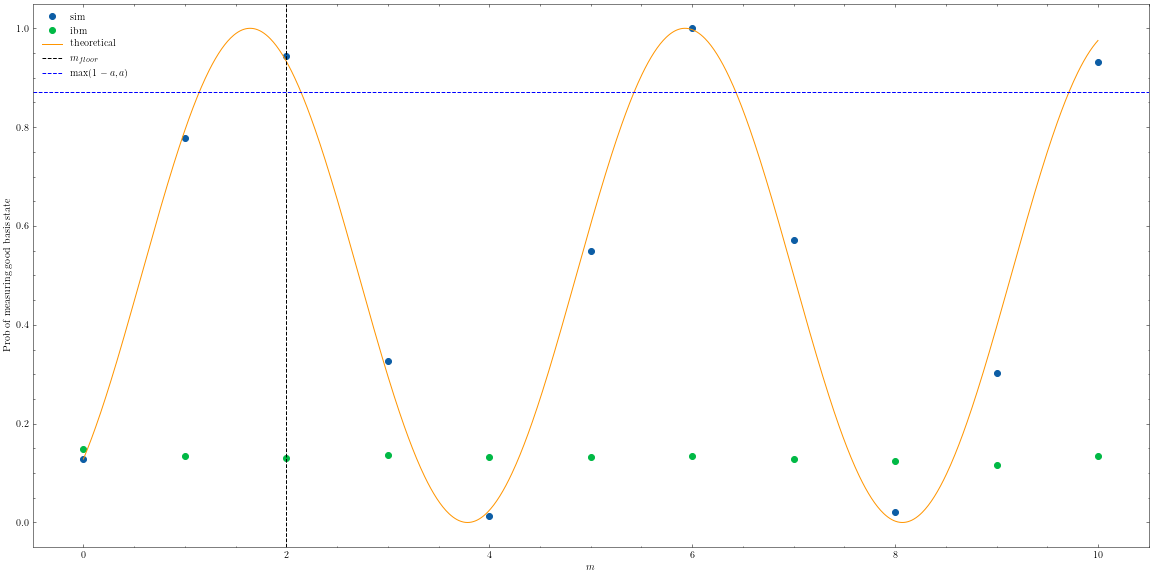

In [41]:
plot_amplification(a_arr_sim, a_arr_ibm)

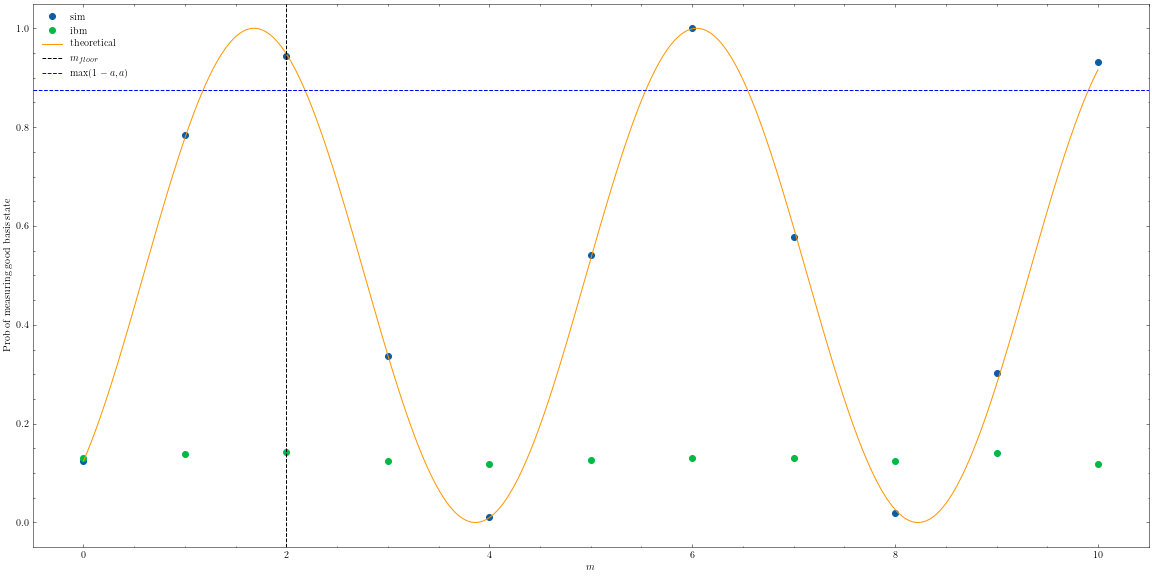

In [42]:
plot_amplification(a_arr_sim_ancilla, a_arr_ibm_ancilla)